<a href="https://colab.research.google.com/github/ptavares96/Analise_de_dados_Airbnb/blob/main/Paulo_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - São Francisco

O [Airbnb](https://www.airbnb.com.br/) é uma platforma de aluguéis e hospedagem que está online desde 2008. A plataforma, que está presente em mais de 190 países, permite que os usuários saiu do usual aluguel de hotéis e procurem alternativas de casas e apartamentos. Assim, de acordo com o tempo de viagem, localidade ou quantidade de pessoas poderá sair mais barato que o alugel de quartos de hotéis.

Com o objetivo de estudar a extração de informação a partir de dados de empresas, este projeto mostra uma análise dos dados do Aribnb para a região São Francisco, California. O projeto faz parte de uma das atividades do Curso Data Science na Prática.

<center><img alt="Analisando Airbnb" width="30%" src="https://airbnblover.com/wp-content/uploads/2017/02/airbnb-refugees-300x158.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de São Francisco, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Os dados foram obtidos pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data/). No portal contém alguns datasets com informações de várias cidades. Esses dados são disponibilizados pela própria empresa Airbnb com o objetivo de difundir a análise das informações na empresa e apliar o conhecimento da população em relação a ciência de dados.

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-12-04/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id : identificação única para o anúncio
* name : nome do anúncio
* host_id : identificador único para o proprietário do imóvel
* host_name : nome do proprietário
* neighbourhood_group :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* neighbourhood : bairro da propriedade
* latitude : coordenada geográfica de latitude da propriedade
* longitude : coordenada geográfica de longitude da propriedade
* room_type : tipo de quarto oferecido para locação
* price : preço da diária do aluguel
* minimum_nights : quantidade mínima de noites para alugar o imóvel
* number_of_reviews : quantidade de avaliações que o imóvel tem
* last_review : data da última avaliação
* reviews_per_month : quantidade de avaliações por mês
* calculated_host_listings_count : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* availability_365 : número de dias disponíveis para locação nos próximos 365 dias
* number_of_reviews_ltm : quantidade de avaliações nos últimos 12 meses
* license : número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,161,2,314,2021-11-19,3.60,1,126,43,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.76,1,365,0,NaN
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365,0,NaN
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,364,0,STR-0000264


In [4]:
# descrição estatística
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.413000e+03,6.413000e+03,0.0,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000,5077.000000,6413.000000,6413.000000,6413.000000
mean,2.783746e+07,8.524930e+07,NaN,37.768517,-122.429795,228.636520,24.007797,44.483861,2.055937,14.352253,166.752534,6.895057
std,1.681251e+07,1.125628e+08,NaN,0.022844,0.026904,671.915606,49.746920,85.496409,5.745197,32.645732,133.528567,16.514490
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.331858e+07,4.440278e+06,NaN,37.753230,-122.442490,93.000000,2.000000,1.000000,0.210000,1.000000,33.000000,0.000000
50%,2.919296e+07,2.712355e+07,NaN,37.772026,-122.423260,145.000000,30.000000,7.000000,0.670000,2.000000,153.000000,1.000000
75%,4.268582e+07,1.220748e+08,NaN,37.787430,-122.410580,232.000000,30.000000,45.000000,2.130000,9.000000,306.000000,5.000000
max,5.365842e+07,4.344078e+08,NaN,37.809540,-122.368230,25000.000000,1125.000000,877.000000,162.000000,154.000000,365.000000,435.000000


 A partir de uma breve descrição estatística dos dodos já é possível fazer algumas observações.

 Nota-se que para a variável **price**, que indica o valor por noite do aluguel, tem a média de aproximadamente \$228 e com 75% dos valores abaixo de \$232. Porém o preço máximo é \$25000. É necéssario tomar cuidado com esse valor máximo pois ele pode indicar ser um **outlier**.

Outro ponto a ser observado é a variável **minimum_nights**. A média de noites mímimas alugadas é aproximadamente 24 noites, com 75% dos valores abaixo de 30 noites. Mas o valor máximo de noites já alugados foram de 1125. Este valor chama a atenção por ser discrepante, podendo ser um **outlier**. 

### **Observando os atributos (variáveis) e quantas entradas o nosso conjunto de dados possui e os tipos das variáveis**`

In [5]:
# identificar o volume de dados do DataFrame
print(f'No dataset há {df.shape[0]} entradas e {df.shape[1]} atributos (variáveis)')
# tipos de variáveis
print('\nOs tipos de varíaveis do dataset são:')
df.dtypes

No dataset há 6413 entradas e 18 atributos (variáveis)

Os tipos de varíaveis do dataset são:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('As variáveis que possuem mais valores ausentes, em porcentagem (%), são:\n')
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

As variáveis que possuem mais valores ausentes, em porcentagem (%), são:



neighbourhood_group               100.000000
license                            43.427413
reviews_per_month                  20.832684
last_review                        20.832684
host_name                           0.218307
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

Observa-se que não há entradas na variável **neighbourhood_group**.E as outras variáveis que possuem valores ausentes não serão relevantes para esta análise. 

### **Observando a distribuição das variáveis** 


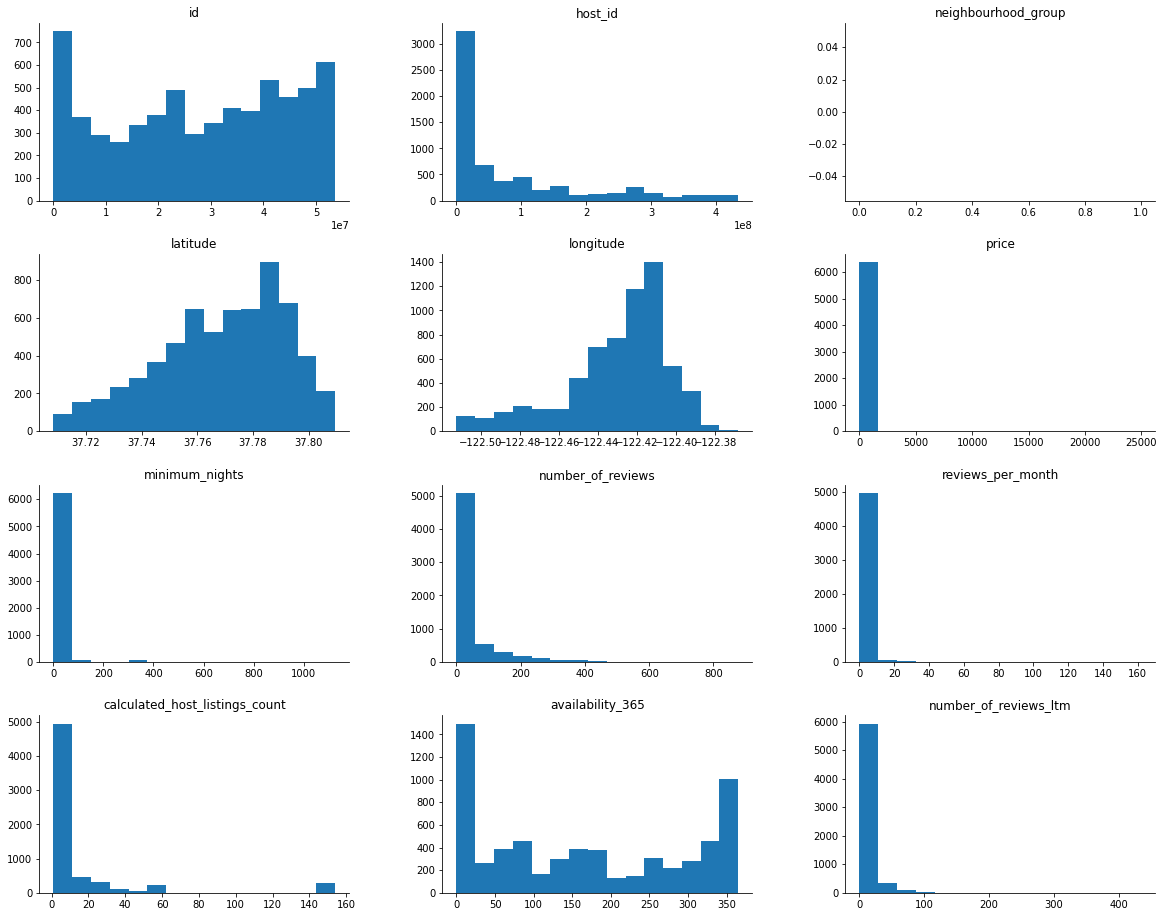

In [38]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize = (20,16), grid=False);
sns.despine();

Com a distribuição das variáveis observa-se que há uma má distribuição nos valores das noites mínimas e nos preços. Essa má distribuição é resultado da presença de valores fora do real - outliers. Assim, para que seja observado adequadamente esses dados é necessário que haja uma tratamento dos valores nessas variáveis. 

### **Média dos preços de aluguel**

In [8]:
# ver a média da coluna "price"
print(f"Média de preços de aluguel para a cidade do São Francisco é de ${df.price.mean():.2f}")

Média de preços de aluguel para a cidade do São Francisco é de $228.64


### **Correlação existente entre as variáveis**

In [9]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.043256,-0.044250,-0.030708,-0.032045,-0.042397,-0.031225
minimum_nights,-0.043256,1.000000,-0.163003,-0.107289,0.100149,0.209016,-0.158436
number_of_reviews,-0.044250,-0.163003,1.000000,0.256977,-0.164693,-0.038447,0.553555
reviews_per_month,-0.030708,-0.107289,0.256977,1.000000,-0.086198,-0.000607,0.563291
calculated_host_listings_count,-0.032045,0.100149,-0.164693,-0.086198,1.000000,0.105267,-0.137893
availability_365,-0.042397,0.209016,-0.038447,-0.000607,0.105267,1.000000,-0.028814
number_of_reviews_ltm,-0.031225,-0.158436,0.553555,0.563291,-0.137893,-0.028814,1.000000


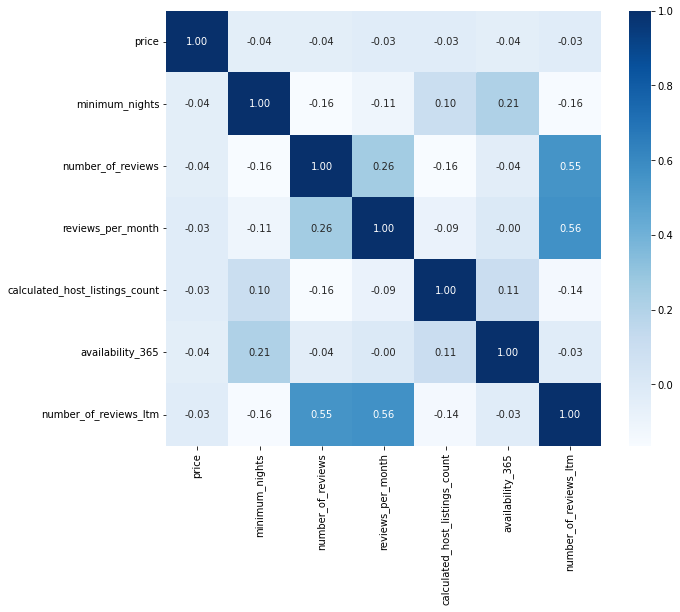

In [40]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='Blues', fmt='.2f', square=True,linecolor='white',annot=True);

Observando a matriz de correalação não se encontra correlações fortes entre as variáveis. 

### **Tipos de imóveis alugados pelo Airbnb em São Francisco**

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
print("Quantidade dos tipos de quartos alugados em São Francisco:\n")
print(df.room_type.value_counts());

Quantidade dos tipos de quartos alugados em São Francisco:

Entire home/apt    4111
Private room       2108
Shared room         133
Hotel room           61
Name: room_type, dtype: int64


In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Quantidade, em porcentagem (%) dos tipos de quartos alugados em São Francisco:\n")
df.room_type.value_counts()/df.shape[0]*100

Quantidade, em porcentagem (%) dos tipos de quartos alugados em São Francisco:



Entire home/apt    64.104163
Private room       32.870731
Shared room         2.073912
Hotel room          0.951193
Name: room_type, dtype: float64

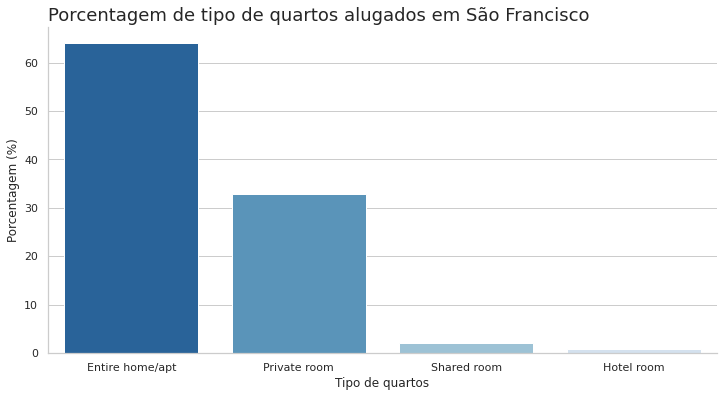

In [63]:
types_room = df.room_type.value_counts()/df.shape[0]*100

palette = sns.color_palette("Blues",n_colors=4)
palette.reverse()


fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=types_room.index, y=types_room.values, palette = palette)

ax.set_title('Porcentagem de tipo de quartos alugados em São Francisco', loc='left', fontsize=18)
ax.set_xlabel('Tipo de quartos', fontsize = 12)
ax.set_ylabel('Porcentagem (%)', fontsize = 12)
sns.despine()

Observa-se que há um preferência de algueis casas ou apartamentos completos. 

### **Localidades alugadas pelo Airbnb na cidade São Francisco**





In [34]:
# ver preços por bairros, na média
print("Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco:\n")
print(df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))

Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco:

neighbourhood
Financial District       754.455090
Chinatown                373.967480
Russian Hill             325.119048
Presidio                 300.222222
Marina                   296.655738
Pacific Heights          291.095890
Castro/Upper Market      267.854167
North Beach              266.243386
Inner Sunset             265.349315
Twin Peaks               264.360000
Downtown/Civic Center    262.313162
Potrero Hill             246.253333
Glen Park                245.982759
Diamond Heights          236.500000
Noe Valley               223.806034
Presidio Heights         210.560000
Western Addition         210.116883
South of Market          204.569892
Nob Hill                 202.786585
Golden Gate Park         196.750000
Inner Richmond           192.191860
Outer Richmond           186.827815
Bernal Heights           186.166102
Haight Ashbury           186.020202
Mission                  178.052158
We

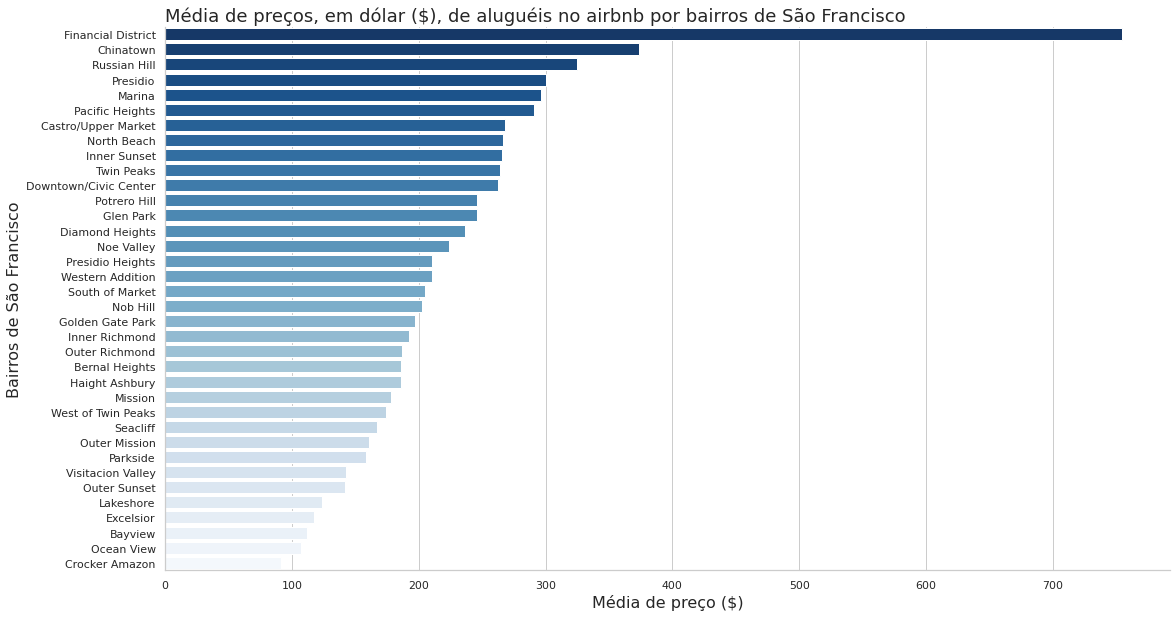

In [62]:
price_nei = df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

palette = sns.color_palette("Blues",n_colors=36)
palette.reverse()

fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=price_nei.index, x=price_nei.values, orient='h', palette = palette)

ax.set_title('Média de preços, em dólar ($), de aluguéis no airbnb por bairros de São Francisco', loc='left', fontsize=18)
ax.set_ylabel('Bairros de São Francisco', fontsize = 16)
ax.set_xlabel('Média de preço ($)', fontsize = 16)
sns.despine()

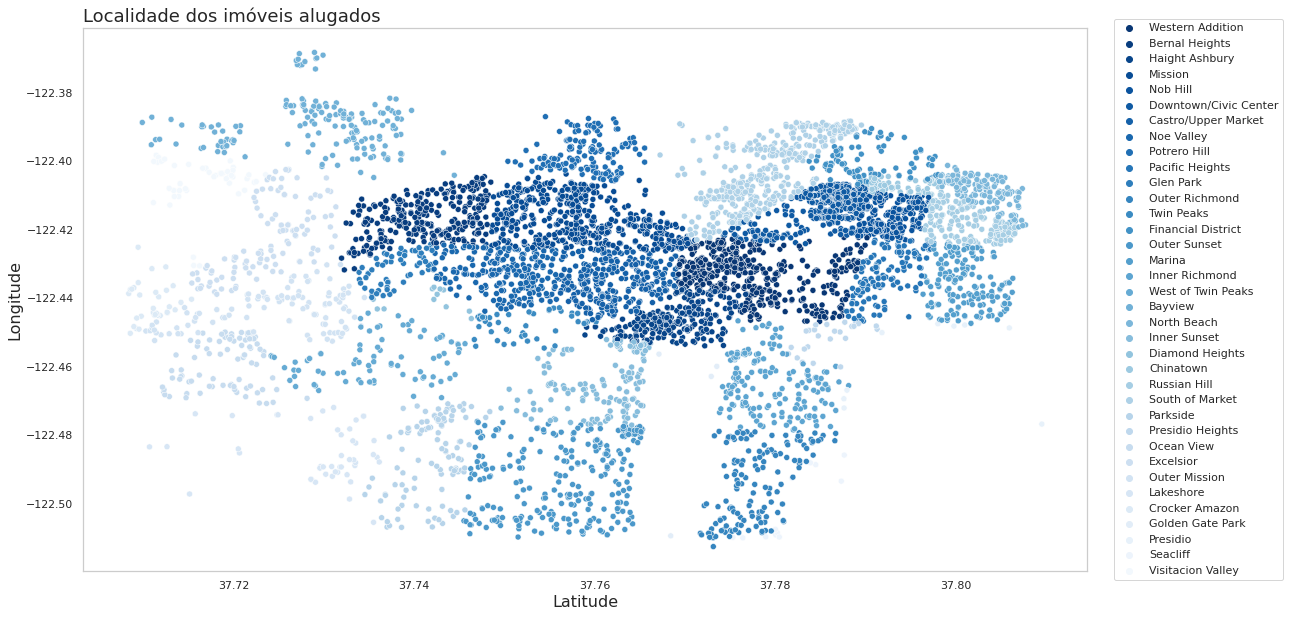

In [89]:
# plotar os imóveis pela latitude-longitude

fig, ax = plt.subplots(figsize=(18,10))

palette = sns.color_palette("Blues",n_colors=36)
palette.reverse()
ax = sns.scatterplot(data=df, x='latitude', y='longitude', hue='neighbourhood', legend=True, palette = palette)
ax.set_title('Localidade dos imóveis alugados', loc='left', fontsize=18)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
ax.set_xlabel('Latitude', fontsize = 16)
ax.set_ylabel('Longitude', fontsize = 16)
ax.grid(False)

plt.show()

### **Média do mínimo de noites para aluguel**

In [87]:
# ver a média da coluna `minimum_nights``
print("A média mínimas de noites alugadas é {}".format(round(df.minimum_nights.mean(),2)))

A média mínimas de noites alugadas é 24.01


Isto é, em média se alugam um imóvel para em São Francisco para no mínimo de **24 noites**.

## Conclusões
